In [37]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 4 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_width_3col_inches = 10
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 

import pandas as pd
import matplotlib.pyplot as plt



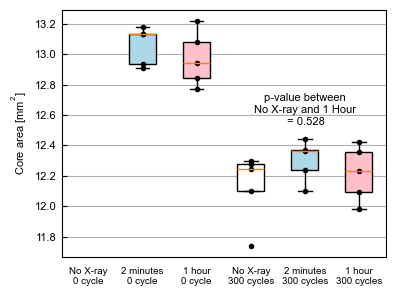

In [38]:
# No X-ray - 300 cycles과 1 hour - 300 cycles 데이터 추출 및 p-value 계산
group_no_xray_300 = data[data['Group'] == 'No X-ray - 300 cycles']['Average']
group_1hour_300 = data[data['Group'] == '1 hour - 300 cycles']['Average']
p_value_no_xray_vs_1hour_300 = calculate_pvalue(group_no_xray_300, group_1hour_300)

# 플롯 크기 설정
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# 박스 플롯 그리기
boxplot = ax.boxplot([data[data['Group'] == group]['Average'] for group in order], 
                     patch_artist=True, showfliers=False)

# 박스 색깔 설정
colors = ['white', '#ADD8E6', '#FFC0CB', 'white', '#ADD8E6', '#FFC0CB']

# 각 박스의 색깔 적용
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# 개별 데이터 포인트 오버레이
for i, group in enumerate(order):
    group_data = data[data['Group'] == group]
    ax.plot([i+1] * len(group_data), group_data['Average'], 'ko', markersize=3)

# x축 레이블에서 '-'을 기준으로 줄바꿈
group_labels = [group.replace(' - ', '\n') for group in order]

# 제목 및 라벨 설정
ax.set_ylabel('Core area [mm$^2$]')
ax.set_xticklabels(group_labels, rotation=0, fontsize=7)

# 그리드 추가
ax.grid(axis='y')

# p-value를 그래프 위에 플랏 (No X-ray - 300 cycles vs 1 hour - 300 cycles)
ax.text(5, np.max(group_no_xray_300) + 0.24, f'p-value between\nNo X-ray and 1 Hour\n = {p_value_no_xray_vs_1hour_300:.3f}', ha='center', fontsize=8)
#plt.figtext(0.5, 1.0, 'p-value: between No X-ray and 1 Hour', fontsize=8, ha='left', va='top')
# 레이아웃 조정
plt.tight_layout()
plt.savefig("fig4.pdf", dpi=300, bbox_inches="tight", format="pdf")
# 플롯 보여주기
plt.show()